# Importance sampling

Author: [Nipun Batra](https://nipunbatra.github.io/)

https://www.youtube.com/watch?v=TNZk8lo4e-Q&t=2733s

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import scipy.stats
%matplotlib inline

rc('font', size=16)
rc('text', usetex=True)

Consider the following likelihood and a Gaussian prior.

In [2]:
# Likelihood
def l(theta):
    return 4+ np.sin(theta) - (theta**2)/3

prior = scipy.stats.norm(0).pdf

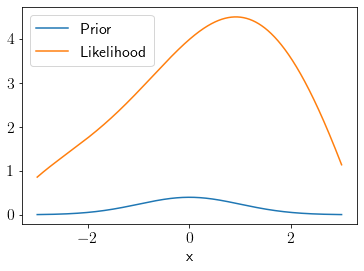

In [3]:
x = np.linspace(-3, 3, 1000)

plt.plot(x, prior(x),label='Prior')
plt.plot(x, l(x),label='Likelihood')
plt.legend();
plt.xlabel('x');

We define a sampling distribution $q(x)$ as the following.

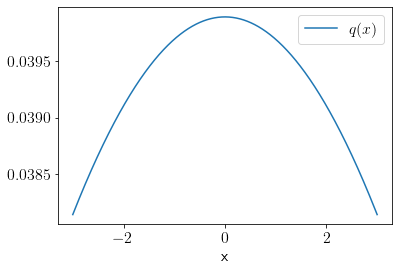

In [4]:
q_rvs = scipy.stats.norm(loc=0, scale=10)
q = q_rvs.pdf

plt.plot(x, q(x), label='$q(x)$');
plt.xlabel('x');
plt.legend();

Let's draw a large number of samples from $q(x)$ distribution.

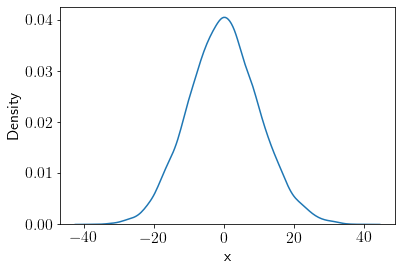

In [5]:
q_samples = q_rvs.rvs(size=10000)

sns.kdeplot(q_samples);
plt.xlabel('x');

We can find the marginal likelihood $z$ using the following technique.

\begin{align}
z &= \int likelihood(x)\cdot prior(x)\cdot dx\\
z &= \int \frac{likelihood(x)\cdot prior(x)}{q(x)}\cdot q(x) \cdot dx\\
z &= \int w(x) \cdot q(x) \cdot dx\\
z &\approx \frac{1}{N}\sum\limits_{i=1}^{N}w(x)
\end{align}

In [6]:
prior_eval_q = prior(q_samples)
likelihood_eval_q = l(q_samples)
z = (prior_eval_q*likelihood_eval_q/q_samples).mean()
z

-0.508527841674989

## Importance sampling for linear regression

Likelihood for linear regression can be given as the following,

$p(\mathbf{y}|\theta) \sim \mathcal{N}(\theta \mathbf{x}, \sigma_n^2I)$ 

In [7]:
theta_gt = 4
sigma_n = 1

# generate some samples

x = np.random.uniform(0, 1, size = 100)
y = np.random.normal(theta_gt*x, sigma_n)

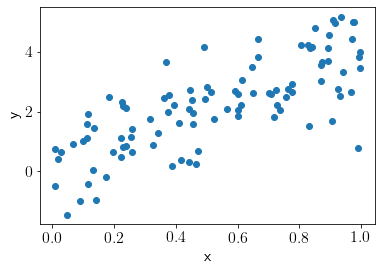

In [8]:
plt.scatter(x, y);
plt.xlabel('x');plt.ylabel('y');

We will use the following $q$ distribution in this problem.

In [9]:
# Proposal

q_rvs = scipy.stats.norm(loc=3, scale=10)
q = q_rvs.pdf

Prior on $\theta$ is Standard Gaussian distribution.

In [10]:
prior = scipy.stats.norm(0).pdf

Likelihood is given as the following,

In [11]:
# Likelihood
def l(theta):
    return scipy.stats.multivariate_normal.pdf(y, mean=theta*x, cov=3*np.eye(len(x)))

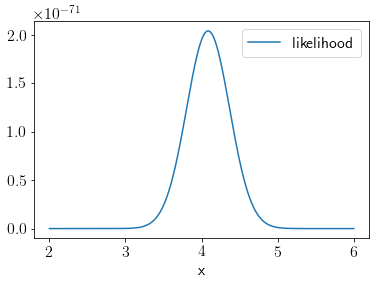

In [12]:
xu = np.linspace(2, 6, 1000)
k = []
for xt in xu:
    k.append(l(xt))
plt.plot(xu, k, label='likelihood');
plt.xlabel('x');
plt.legend();

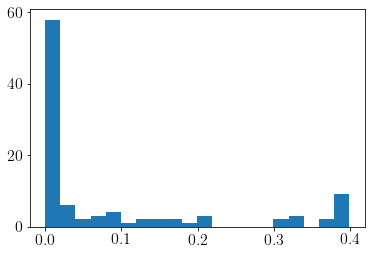

In [13]:
plt.hist(scipy.stats.norm(10*x, 1).pdf(y), density=False, bins=20);

Let us draw a few samples from the $q$ distribution.

In [14]:
n_samples = 1000
q_samples = q_rvs.rvs(size=n_samples)

We calculate the $w(x)$ using the samples drawn from the $q$ distribution.

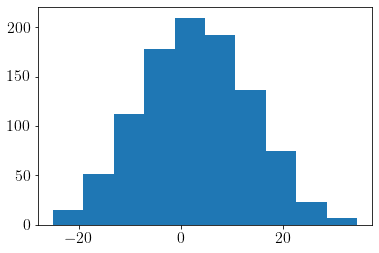

In [15]:
plt.hist(q_samples)

w = np.zeros(n_samples)
for i in range(n_samples):
    theta_i = q_samples[i]
    likelihood_i = l(theta_i)
    prior_i = prior(theta_i)
    q_i = q_rvs.pdf(theta_i)
    w_i = likelihood_i*prior_i/q_i
    w[i] = w_i

It is easy to retrive marginal likelihood now.

In [16]:
marginal_likelihood = np.mean(w)

Let us compute the full posterior distribution.

In [17]:
post = np.zeros(n_samples)
for i in range(n_samples):
    theta_i = q_samples[i]
    likelihood_i = l(theta_i)
    prior_i = prior(theta_i)
    post_i = likelihood_i*prior_i
    post[i] = post_i/marginal_likelihood

We can visualize the posterior distribution as the following,

approx posterior mean 3.7819254239877527


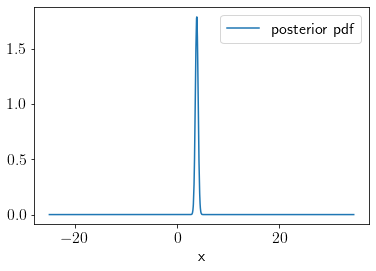

In [18]:
idx = np.argsort(q_samples)
plt.plot(q_samples[idx], post[idx], label='posterior pdf');
plt.xlabel('x')
plt.legend()

print('approx posterior mean', np.mean(q_samples[np.where(post>1.25)]))